# What is the True Normal Human Body Temperature? 

Sarah Robinson
9.11.18

[*solutions inline*]

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>

## 1. Is the distribution of body temperatures normal? 
* Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

* Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [32]:
temp_df = pd.read_csv('../EDA_human_temperature/data/human_body_temperature.csv')

In [44]:
body_temp = temp_df.temperature.values

### Testing Normality: Graphically

In [54]:
#create cdf function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / float(n)
    
    return(x, y)

In [57]:
#compute cdf
mean = np.mean(body_temp)
std=np.std(body_temp)
samples = np.random.normal(mean, std, size=10000)
x, y = ecdf(body_temp)
x_theor, y_theor = ecdf(samples)


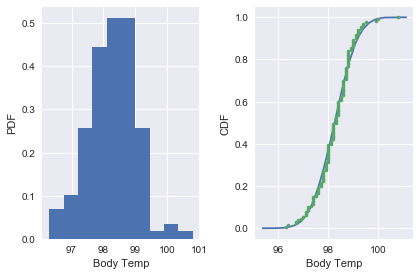

In [130]:
#plot histogram
sns.set()
_ = plt.subplot(1, 2, 1)
_ = plt.hist(body_temp, bins = 10, density=True)
_ = plt.xlabel('Body Temp')
_ = plt.ylabel('PDF')


#plot cdf
_ = plt.subplot(1,2,2)
_= plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('Body Temp')
_ = plt.ylabel('CDF')
_ = plt.tight_layout()
plt.show()

*Looks pretty normal to me, but will use a normality test to be sure.*

### Calculating Normality
H0: The sample comes from a normal distribution.


In [134]:
#use normality test
alpha = 0.05
k2, p = stats.normaltest(body_temp)
if p < alpha:
    print("The null hypothesis can be rejected.")
else: 
    print("The null hypothesis cannot be rejected.")
print("p = "+ str(p))

The null hypothesis cannot be rejected.
p = 0.2587479863488254


## 2. Is the sample size large? Are the observations independent?
* Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.


In [136]:
print("The sample size is " + str(len(temp_df)))

The sample size is 130


*The sample size is large enough (n > 30 ) to apply the central limit theorem for analysis.The observations are independant, since one persons body temperature does not control anothers.*  

 ## 3. Is the true population mean really 98.6 degrees F?
* First, try a bootstrap hypothesis test.
*  Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
* In this situation, is it appropriate to use the $t$ or $z$ statistic? 
* Now try using the other test. How is the result be different? Why?


### Hypothesis Testing: 
H0: The true mean is 98.6 degrees F.

alpha = 0.05

 **Bootstrap hypothesis test:** 
null hypothesis - the true mean of Wunderlich's observations is 98.6 degrees F.

In [72]:
#define bootstrap replicates function
def draw_bs_reps(data, func, size = 1):
    """Draw bootstap replicates."""
    bs_replicates = np.empty(size)
    
    
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size = len(data)))
    
    return bs_replicates

In [73]:
#shift the mean
accepted_mean = 98.6
wunder_mean = np.mean(body_temp)
wunder_shifted = body_temp - wunder_mean + accepted_mean

In [80]:
#calculate test statistic
def calc_diff(data, accepted_mean = 98.6):
    return np.mean(data) - accepted_mean
diff = calc_diff(body_temp)
print(diff)

-0.35076923076924515


In [83]:
#Compute p-value
bs_replicates = draw_bs_reps(wunder_shifted, calc_diff, 100000)
p_value = np.sum(bs_replicates <= diff)/100000
print(p_value)

0


*It is very unlikely that the true mean of the data is 98.6, given that the p-value is very small. So small that running the test 100,000 does not give a result.*

**Frequentist Statistical Testing:** 

*I will use a one sample test because I am comparing the data set to one value. Given that the sample size is over 30, which is large enought to apply the centra limit theorem. For this, a z-statistic is appropriate. A z-statistic assumes the distribution is normal, which we have a .75 probability that it is.*


Using a Z Test: for alpha = 0.05 if z> 1.96, reject Null, if z<-1.96, reject Null

In [155]:
def zscore(data1, data2):
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    std = np.std(data1)
    n = len(data1)
    z = (mean1 - mean2)/(std/np.sqrt(n))
    
    p_value = stats.norm.cdf(z)*2
    return z, p_value

z, p = zscore(body_temp, 98.6)

if z > 1.96 or z < -1.96:
    print("The Null Hypothesis is Rejected.")
else:
    print("We do not reject the Null Hypothesis.")
print("The zscore is:" +str(z))
print("The p value is: "+ str(p))

The Null Hypothesis is Rejected.
The zscore is:-5.4759252020785585
The p value is: 4.3523151658713056e-08


In [137]:
#calculate T-test for the mean of one group of scores
stats.ttest_1samp(body_temp, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

*The t-statistic is only very slightly smaller than the z-statistic. This is because wehen a sample size is greater than 30, t-statistics and z-statistics will give similar results.*

## 4.  Draw a small sample of size 10 from the data and repeat both frequentist tests. 

 * Which one is the correct one to use? 
 * What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
 

*In this case, it is appropriate to use a t-test, since the sample size is < 30. Both cases do not reject the null hypothesis. The smaller sample size is more similar to the hypothesized mean of 98.6 degrees F, and the t and z statistic again produce similar results.*

In [160]:
#calculating t statistic
sample10 = np.random.choice(body_temp, 10)
t_score, p = stats.ttest_1samp(sample10, 98.6)
if p <= alpha:
    print("The Null Hypothesis can be rejected")
else:
    print("The Null Hypothesis cannot be rejected")

print("t=" + str(t_score))
print("p="+str(p))

The Null Hypothesis cannot be rejected
t=-0.8472610750850469
p=0.41880949712972937


In [161]:
#calculating z statistic
z, p = zscore(sample10, 98.6)
if z > 1.96 or z < -1.96:
    print("The Null Hypothesis is Rejected.")
else:
    print("We do not reject the Null Hypothesis.")
    
print("zscore = " +str(z))
print("p = "+ str(p))

We do not reject the Null Hypothesis.
zscore = -0.8930915900238959
p = 0.3718081263242742


## 5. At what temperature should we consider someone's temperature to be "abnormal"?
 * As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
 *  Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.


### Confidence Interval
Using a 95% confidence interval, the critical zscore would be 1.96.  

In [180]:
# Bootstrap confidence interval
bs_replicates_mean = draw_bs_reps(body_temp, np.mean, 10000)
low, high = np.percentile(bs_replicates_mean, [2.5,97.5])
print("A normal temperature, with 95% confidence, is between " +str(low)+ " and " +str(high)+" degrees F.")

A normal temperature, with 95% confidence, is between 98.12384615384616 and 98.3753846153846 degrees F.


In [181]:
#margin of error with frequentist
std = np.std(body_temp)
n = len(body_temp)
mean = np.mean(body_temp)

moe = (1.96 * std )/ np.sqrt(n)
print("Margin of error is calculated to be " + str(moe))
upper = moe + mean
lower = mean - moe

print ("A normal temperature, with 95% confidence, is between " +str(lower)+ " and " +str(upper)+" degrees F.")

Margin of error is calculated to be 0.12555096480257902
A normal temperature, with 95% confidence, is between 98.12367980442816 and 98.37478173403333 degrees F.


## 6. Is there a significant difference between males and females in normal temperature?
* What testing approach did you use and why?
* Write a story with your conclusion in the context of the original problem.


### Comparing temperature between Genders
H0: Female and Male temperatures have identical varience

In [188]:
female_temp = temp_df.temperature[temp_df.gender == 'F'].values
male_temp = temp_df.temperature[temp_df.gender =='M'].values

In [191]:
t_score, p = stats.ttest_ind(female_temp, male_temp)
if p <= alpha:
    print("The Null Hypothesis can be rejected")
else:
    print("The Null Hypothesis cannot be rejected")

print("t=" + str(t_score))
print("p="+str(p))


The Null Hypothesis can be rejected
t=2.2854345381656103
p=0.02393188312239561


*For this test, I used a two sided, independent t-test. I chose this approach because the two populations are independant of each other. I used the frequentist method over a bootstrap method, because I found it faster and more convienient since scipy has that function built in.*